ASSGINMENT 2
OMAR AHMED
900201077
INSTRUCTOR: DR DHAFER MALOUCHE

In this assignment i will do two things to two different data sets. First, i will analyze the probabilities of winning the matches through different categories such as different  types of tournaments, countries, home and away team and i will try and deduce which factors affect the probability of winning more. Secondly i will analyze the covid data set and compare the death to cases ratio of several factors such as income level, region, country and so on. 

In [3]:
import pandas as pd

df1 = pd.read_csv ('results.csv')

In [3]:
df1

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False
...,...,...,...,...,...,...,...,...,...
43183,02/01/2022,Suriname,Guyana,2,1,Friendly,Paramaribo,Suriname,False
43184,02/02/2022,Burkina Faso,Senegal,1,3,African Cup of Nations,Yaoundé,Cameroon,True
43185,02/03/2022,Cameroon,Egypt,0,0,African Cup of Nations,Yaoundé,Cameroon,False
43186,02/05/2022,Cameroon,Burkina Faso,3,3,African Cup of Nations,Yaoundé,Cameroon,False


In [4]:
import numpy as np
import scipy.stats as st

In [5]:
st.t.interval(alpha=0.95, df=len(df1.home_score)-1,
              loc=np.mean(df1.home_score),
              scale=st.sem(df1.home_score))

(1.726010366302348, 1.7590780841931601)

In [6]:
st.t.interval(alpha=0.95, df=len(df1.away_score)-1,
              loc=np.mean(df1.away_score),
              scale=st.sem(df1.away_score))

(1.1694656089386979, 1.195867353921356)

In [7]:
x=df1['home_score']-df1['away_score']

In [8]:
x

0        0
1        2
2        1
3        0
4        3
        ..
43183    1
43184   -2
43185    0
43186    0
43187    0
Length: 43188, dtype: int64

In [9]:
conditions=[(x>0),(x<0),(x==0)]

In [10]:
values=['win','lose','draw']

In [11]:
import numpy as np

In [12]:
df1["results"]=np.select(conditions,values)

In [13]:
df1

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,results
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,draw
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,win
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,win
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,draw
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,win
...,...,...,...,...,...,...,...,...,...,...
43183,02/01/2022,Suriname,Guyana,2,1,Friendly,Paramaribo,Suriname,False,win
43184,02/02/2022,Burkina Faso,Senegal,1,3,African Cup of Nations,Yaoundé,Cameroon,True,lose
43185,02/03/2022,Cameroon,Egypt,0,0,African Cup of Nations,Yaoundé,Cameroon,False,draw
43186,02/05/2022,Cameroon,Burkina Faso,3,3,African Cup of Nations,Yaoundé,Cameroon,False,draw


In [14]:
df1.results.value_counts()

win     21009
lose    12224
draw     9955
Name: results, dtype: int64

In [15]:
df1.results.value_counts(normalize=True)

win     0.486455
lose    0.283042
draw    0.230504
Name: results, dtype: float64

In [16]:
df_nonneutral=df1[df1.neutral==False]

In [17]:
df_nonneutral

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,results
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,draw
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,win
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,win
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,draw
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,win
...,...,...,...,...,...,...,...,...,...,...
43181,02/01/2022,Nepal,Mauritius,1,0,Friendly,Kathmandu,Nepal,False,win
43182,02/01/2022,Nicaragua,Belize,1,1,Friendly,Managua,Nicaragua,False,draw
43183,02/01/2022,Suriname,Guyana,2,1,Friendly,Paramaribo,Suriname,False,win
43185,02/03/2022,Cameroon,Egypt,0,0,African Cup of Nations,Yaoundé,Cameroon,False,draw


In [18]:
df_nonneutral.results.value_counts(normalize=True)

win     0.505003
lose    0.263693
draw    0.231304
Name: results, dtype: float64

In [19]:
df_nonneutralegypt=df_nonneutral[df_nonneutral.country=="Egypt"]

In [20]:
df_nonneutralegypt

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,results
1463,2/19/1932,Egypt,Hungary,0,0,Friendly,Cairo,Egypt,False,draw
1661,3/16/1934,Egypt,Israel,7,1,FIFA World Cup qualification,Cairo,Egypt,False,win
1895,6/19/1936,Egypt,Greece,3,1,Friendly,Cairo,Egypt,False,win
2927,12/24/1948,Egypt,Norway,1,1,Friendly,Cairo,Egypt,False,draw
3080,2/17/1950,Egypt,Greece,2,0,Friendly,Cairo,Egypt,False,win
...,...,...,...,...,...,...,...,...,...,...
42165,3/29/2021,Egypt,Comoros,4,0,African Cup of Nations qualification,Cairo,Egypt,False,win
42590,09/01/2021,Egypt,Angola,1,0,FIFA World Cup qualification,Cairo,Egypt,False,win
42758,9/30/2021,Egypt,Liberia,2,0,Friendly,Alexandria,Egypt,False,win
42812,10/08/2021,Egypt,Libya,1,0,FIFA World Cup qualification,Alexandria,Egypt,False,win


In [21]:
df_nonneutralegypt['away_team'].value_counts()

Uganda         12
Tunisia        11
Ghana          10
Libya           9
Cameroon        8
               ..
England         1
Switzerland     1
Chile           1
Israel          1
Comoros         1
Name: away_team, Length: 82, dtype: int64

In [208]:
x=df_nonneutralegypt.results.value_counts()

In [209]:
x

win     171
draw     44
lose     43
Name: results, dtype: int64

In [23]:
df_nonneutralegypt.results.value_counts(normalize=True)

win     0.662791
draw    0.170543
lose    0.166667
Name: results, dtype: float64

In [24]:
df_nonneutralegypt.tournament.value_counts()

Friendly                                145
FIFA World Cup qualification             48
African Cup of Nations qualification     39
African Cup of Nations                   20
Nile Basin Tournament                     5
African Nations Championship              1
Name: tournament, dtype: int64

In [190]:
import statsmodels.api as sm

In [191]:
from statsmodels.stats.proportion import proportion_confint

In [27]:
x

win     171
draw     44
lose     43
Name: results, dtype: int64

In [28]:
ci_win_egy=proportion_confint(count=x[0],nobs=x.sum(),alpha=(1-.95))

In [29]:
ci_win_egy

(0.6051039288730269, 0.7204774664758102)

In [30]:
x

win     171
draw     44
lose     43
Name: results, dtype: int64

In [31]:
df1

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,results
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,draw
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,win
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,win
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,draw
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,win
...,...,...,...,...,...,...,...,...,...,...
43183,02/01/2022,Suriname,Guyana,2,1,Friendly,Paramaribo,Suriname,False,win
43184,02/02/2022,Burkina Faso,Senegal,1,3,African Cup of Nations,Yaoundé,Cameroon,True,lose
43185,02/03/2022,Cameroon,Egypt,0,0,African Cup of Nations,Yaoundé,Cameroon,False,draw
43186,02/05/2022,Cameroon,Burkina Faso,3,3,African Cup of Nations,Yaoundé,Cameroon,False,draw


In [32]:
df_nonneutral

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,results
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,draw
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,win
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,win
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,draw
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,win
...,...,...,...,...,...,...,...,...,...,...
43181,02/01/2022,Nepal,Mauritius,1,0,Friendly,Kathmandu,Nepal,False,win
43182,02/01/2022,Nicaragua,Belize,1,1,Friendly,Managua,Nicaragua,False,draw
43183,02/01/2022,Suriname,Guyana,2,1,Friendly,Paramaribo,Suriname,False,win
43185,02/03/2022,Cameroon,Egypt,0,0,African Cup of Nations,Yaoundé,Cameroon,False,draw


In [33]:
df_England=df_nonneutral[df_nonneutral.country=="England"]

In [34]:
df_England

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,results
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,win
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,draw
6,1877-03-03,England,Scotland,1,3,Friendly,London,England,False,lose
10,1879-01-18,England,Wales,2,1,Friendly,London,England,False,win
11,1879-04-05,England,Scotland,5,4,Friendly,London,England,False,win
...,...,...,...,...,...,...,...,...,...,...
42521,07/07/2021,England,Denmark,2,1,UEFA Euro,London,England,False,win
42533,07/11/2021,England,Italy,1,1,UEFA Euro,London,England,False,draw
42680,09/05/2021,England,Andorra,4,0,FIFA World Cup qualification,London,England,False,win
42893,10/12/2021,England,Hungary,1,1,FIFA World Cup qualification,London,England,False,draw


In [35]:
df_England["results"].value_counts()

win     319
draw    105
lose     75
Name: results, dtype: int64

In [36]:
df_England["results"].value_counts(normalize=True)

win     0.639279
draw    0.210421
lose    0.150301
Name: results, dtype: float64

In [37]:
df_England["away_team"].value_counts()

Scotland            59
Wales               53
Northern Ireland    50
Germany             14
France              12
                    ..
Georgia              1
Liechtenstein        1
South Africa         1
Serbia               1
Kosovo               1
Name: away_team, Length: 92, dtype: int64

In [38]:
x=df_England["results"].value_counts()

In [39]:
x

win     319
draw    105
lose     75
Name: results, dtype: int64

In [40]:
ci_win_england=proportion_confint(count=x[0],nobs=x.sum(),alpha=(1-.95))

In [41]:
ci_win_england

(0.5971449281308193, 0.6814121860976375)

In [42]:
df_cameroon=df_nonneutral[df_nonneutral.country=="Cameroon"]

In [43]:
df_cameroon

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,results
5305,01/01/1963,Cameroon,Nigeria,1,2,Friendly,Yaoundé,Cameroon,False,lose
5524,10/31/1963,Cameroon,Togo,2,1,Friendly,Yaoundé,Cameroon,False,win
5577,12/31/1963,Cameroon,Guinea,1,5,Friendly,Yaoundé,Cameroon,False,lose
5587,1/31/1964,Cameroon,Benin,2,4,Friendly,Yaoundé,Cameroon,False,lose
5588,02/02/1964,Cameroon,Congo,7,1,Friendly,Yaoundé,Cameroon,False,win
...,...,...,...,...,...,...,...,...,...,...
43142,1/17/2022,Cameroon,Cape Verde,1,1,African Cup of Nations,Yaoundé,Cameroon,False,draw
43160,1/24/2022,Cameroon,Comoros,2,1,African Cup of Nations,Yaoundé,Cameroon,False,win
43175,1/29/2022,Cameroon,Gambia,2,0,African Cup of Nations,Douala,Cameroon,False,win
43185,02/03/2022,Cameroon,Egypt,0,0,African Cup of Nations,Yaoundé,Cameroon,False,draw


In [44]:
df_cameroon["results"].value_counts()

win     100
draw     41
lose     15
Name: results, dtype: int64

In [45]:
df_cameroon["results"].value_counts(normalize=True)

win     0.641026
draw    0.262821
lose    0.096154
Name: results, dtype: float64

In [46]:
df_cameroon["away_team"].value_counts()

DR Congo                    17
Congo                       12
Gabon                        9
Togo                         9
Egypt                        7
Guinea                       6
Nigeria                      5
Zimbabwe                     5
Senegal                      4
Angola                       4
Ivory Coast                  4
Malawi                       4
Zambia                       4
Tunisia                      3
Benin                        3
Burkina Faso                 3
Sudan                        3
Mozambique                   3
Libya                        3
Cape Verde                   3
Niger                        3
Sierra Leone                 3
Comoros                      2
Rwanda                       2
Somalia                      2
Liberia                      2
Mauritius                    2
Gambia                       2
Equatorial Guinea            2
Mali                         2
Ghana                        2
Morocco                      2
Kenya   

In [47]:
x=df_cameroon["results"].value_counts()

In [48]:
x

win     100
draw     41
lose     15
Name: results, dtype: int64

out of the countries investigated, England has the most wins 

In [49]:
ci_win_cameroon=proportion_confint(count=x[0],nobs=x.sum(),alpha=(1-.95))

In [50]:
ci_win_cameroon

(0.5657498709629245, 0.7163014110883577)

In [51]:
df_acn=df_nonneutral[df_nonneutral.tournament=="African Cup of Nations"]

In [52]:
df_acn

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,results
4101,02/10/1957,Sudan,Egypt,1,2,African Cup of Nations,Khartoum,Sudan,False,lose
5079,1/14/1962,Ethiopia,Tunisia,4,2,African Cup of Nations,Addis Ababa,Ethiopia,False,win
5082,1/21/1962,Ethiopia,Egypt,4,2,African Cup of Nations,Addis Ababa,Ethiopia,False,win
5548,11/24/1963,Ghana,Tunisia,1,1,African Cup of Nations,Accra,Ghana,False,draw
5550,11/26/1963,Ghana,Ethiopia,2,0,African Cup of Nations,Accra,Ghana,False,win
...,...,...,...,...,...,...,...,...,...,...
43142,1/17/2022,Cameroon,Cape Verde,1,1,African Cup of Nations,Yaoundé,Cameroon,False,draw
43160,1/24/2022,Cameroon,Comoros,2,1,African Cup of Nations,Yaoundé,Cameroon,False,win
43175,1/29/2022,Cameroon,Gambia,2,0,African Cup of Nations,Douala,Cameroon,False,win
43185,02/03/2022,Cameroon,Egypt,0,0,African Cup of Nations,Yaoundé,Cameroon,False,draw


In [53]:
x=df_acn["results"].value_counts()

In [54]:
x

win     84
draw    40
lose    28
Name: results, dtype: int64

In [55]:
ci_win_acn=proportion_confint(count=x[0],nobs=x.sum(),alpha=(1-.95))

In [56]:
ci_win_acn

(0.47358614127294724, 0.6316770166217898)

In [57]:
df_acn["home_team"].value_counts()

Egypt                20
Ghana                18
Cameroon             12
Tunisia              11
Nigeria              11
South Africa         10
Equatorial Guinea    10
Ethiopia             10
Gabon                 7
Mali                  6
Burkina Faso          6
Sudan                 6
Algeria               5
Libya                 5
Morocco               5
Angola                4
Senegal               3
Ivory Coast           3
Name: home_team, dtype: int64

In [58]:
df_acn1=df_acn[df_acn.home_team=="Egypt"]

In [59]:
df_acn1

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,results
8996,03/01/1974,Egypt,Uganda,2,1,African Cup of Nations,Cairo,Egypt,False,win
9000,03/04/1974,Egypt,Zambia,3,1,African Cup of Nations,Cairo,Egypt,False,win
9004,03/06/1974,Egypt,Ivory Coast,2,0,African Cup of Nations,Cairo,Egypt,False,win
9011,03/09/1974,Egypt,DR Congo,2,3,African Cup of Nations,Cairo,Egypt,False,lose
9013,03/11/1974,Egypt,Congo,4,0,African Cup of Nations,Cairo,Egypt,False,win
14213,03/07/1986,Egypt,Senegal,0,1,African Cup of Nations,Cairo,Egypt,False,lose
14218,03/10/1986,Egypt,Ivory Coast,2,0,African Cup of Nations,Cairo,Egypt,False,win
14227,3/13/1986,Egypt,Mozambique,2,0,African Cup of Nations,Cairo,Egypt,False,win
14236,3/17/1986,Egypt,Morocco,1,0,African Cup of Nations,Cairo,Egypt,False,win
14240,3/21/1986,Egypt,Cameroon,0,0,African Cup of Nations,Cairo,Egypt,False,draw


In [60]:
df_acn1["results"].value_counts()

win     14
lose     3
draw     3
Name: results, dtype: int64

this tells us the number of matches that egypt won in the african cup of nations cup 

In [61]:
df_acn1["results"].value_counts(normalize=True)

win     0.70
lose    0.15
draw    0.15
Name: results, dtype: float64

In [62]:
df_acn2=df_acn[df_acn.home_team=="Cameroon"]

In [63]:
df_acn2

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,results
8150,2/23/1972,Cameroon,Kenya,2,1,African Cup of Nations,Yaoundé,Cameroon,False,win
8155,2/26/1972,Cameroon,Togo,2,0,African Cup of Nations,Yaoundé,Cameroon,False,win
8159,2/28/1972,Cameroon,Mali,1,1,African Cup of Nations,Yaoundé,Cameroon,False,draw
8164,03/02/1972,Cameroon,Congo,0,1,African Cup of Nations,Yaoundé,Cameroon,False,lose
8166,03/04/1972,Cameroon,DR Congo,5,2,African Cup of Nations,Yaoundé,Cameroon,False,win
43113,01/09/2022,Cameroon,Burkina Faso,2,1,African Cup of Nations,Yaoundé,Cameroon,False,win
43126,1/13/2022,Cameroon,Ethiopia,4,1,African Cup of Nations,Yaoundé,Cameroon,False,win
43142,1/17/2022,Cameroon,Cape Verde,1,1,African Cup of Nations,Yaoundé,Cameroon,False,draw
43160,1/24/2022,Cameroon,Comoros,2,1,African Cup of Nations,Yaoundé,Cameroon,False,win
43175,1/29/2022,Cameroon,Gambia,2,0,African Cup of Nations,Douala,Cameroon,False,win


In [64]:
df_acn2["results"].value_counts(normalize=True)

win     0.583333
draw    0.333333
lose    0.083333
Name: results, dtype: float64

In [65]:
df_acn1["results"].value_counts()

win     14
lose     3
draw     3
Name: results, dtype: int64

In [89]:
df1

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,results
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,draw
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,win
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,win
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,draw
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,win
...,...,...,...,...,...,...,...,...,...,...
43183,02/01/2022,Suriname,Guyana,2,1,Friendly,Paramaribo,Suriname,False,win
43184,02/02/2022,Burkina Faso,Senegal,1,3,African Cup of Nations,Yaoundé,Cameroon,True,lose
43185,02/03/2022,Cameroon,Egypt,0,0,African Cup of Nations,Yaoundé,Cameroon,False,draw
43186,02/05/2022,Cameroon,Burkina Faso,3,3,African Cup of Nations,Yaoundé,Cameroon,False,draw


In [90]:
df_eng=df_nonneutral[df_nonneutral.home_team=="England"]

In [91]:
df_eng

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,results
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,win
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,draw
6,1877-03-03,England,Scotland,1,3,Friendly,London,England,False,lose
10,1879-01-18,England,Wales,2,1,Friendly,London,England,False,win
11,1879-04-05,England,Scotland,5,4,Friendly,London,England,False,win
...,...,...,...,...,...,...,...,...,...,...
42521,07/07/2021,England,Denmark,2,1,UEFA Euro,London,England,False,win
42533,07/11/2021,England,Italy,1,1,UEFA Euro,London,England,False,draw
42680,09/05/2021,England,Andorra,4,0,FIFA World Cup qualification,London,England,False,win
42893,10/12/2021,England,Hungary,1,1,FIFA World Cup qualification,London,England,False,draw


In [92]:
x=df_eng["results"].value_counts()

In [93]:
x

win     300
draw    101
lose     63
Name: results, dtype: int64

In [94]:
df_eng["results"].value_counts(normalize=True)

win     0.646552
draw    0.217672
lose    0.135776
Name: results, dtype: float64

In [95]:
ci_win_eng=proportion_confint(count=x[0],nobs=x.sum(),alpha=(1-.95))

In [96]:
ci_win_eng

(0.6030552883111224, 0.6900481599647397)

In [97]:
import numpy as np
from scipy.stats import norm,t
import pandas as pd

In [98]:
df1["tournament"]

0                      Friendly
1                      Friendly
2                      Friendly
3                      Friendly
4                      Friendly
                  ...          
43183                  Friendly
43184    African Cup of Nations
43185    African Cup of Nations
43186    African Cup of Nations
43187    African Cup of Nations
Name: tournament, Length: 43188, dtype: object

In [99]:
df_friend=df_nonneutral[df_nonneutral.tournament=="Friendly"]

In [100]:
df_friend

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,results
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,draw
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,win
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,win
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,draw
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,win
...,...,...,...,...,...,...,...,...,...,...
43179,02/01/2022,Bahrain,DR Congo,1,0,Friendly,Riffa,Bahrain,False,win
43180,02/01/2022,Kuwait,Libya,0,2,Friendly,Kuwait City,Kuwait,False,lose
43181,02/01/2022,Nepal,Mauritius,1,0,Friendly,Kathmandu,Nepal,False,win
43182,02/01/2022,Nicaragua,Belize,1,1,Friendly,Managua,Nicaragua,False,draw


In [101]:
x=df_friend["results"].value_counts()

In [102]:
x

win     7217
lose    4019
draw    3739
Name: results, dtype: int64

In [103]:
ci_win_friend=proportion_confint(count=x[0],nobs=x.sum(),alpha=(1-.95))

In [104]:
ci_win_friend

(0.4739335928548191, 0.4899395290149639)

In [105]:
df_friend_egy=df_friend[df_friend.home_team=="Egypt"]

In [106]:
df_friend_egy

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,results
1463,2/19/1932,Egypt,Hungary,0,0,Friendly,Cairo,Egypt,False,draw
1895,6/19/1936,Egypt,Greece,3,1,Friendly,Cairo,Egypt,False,win
2927,12/24/1948,Egypt,Norway,1,1,Friendly,Cairo,Egypt,False,draw
3080,2/17/1950,Egypt,Greece,2,0,Friendly,Cairo,Egypt,False,win
3425,1/16/1953,Egypt,Yugoslavia,1,3,Friendly,Cairo,Egypt,False,lose
...,...,...,...,...,...,...,...,...,...,...
40925,6/13/2019,Egypt,Tanzania,1,0,Friendly,Alexandria,Egypt,False,win
40947,6/16/2019,Egypt,Guinea,3,1,Friendly,Alexandria,Egypt,False,win
41450,10/14/2019,Egypt,Botswana,1,0,Friendly,Cairo,Egypt,False,win
41514,11/07/2019,Egypt,Liberia,1,0,Friendly,Alexandria,Egypt,False,win


In [107]:
df_friend_egy["results"].value_counts()

win     80
lose    35
draw    30
Name: results, dtype: int64

In [108]:
df_friend_egy["results"].value_counts(normalize=True)

win     0.551724
lose    0.241379
draw    0.206897
Name: results, dtype: float64

In [109]:
df_friend_scot=df_friend[df_friend.home_team=="Scotland"]

In [110]:
df_friend_scot

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,results
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,draw
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,win
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,win
5,1876-03-25,Scotland,Wales,4,0,Friendly,Glasgow,Scotland,False,win
8,1878-03-02,Scotland,England,7,2,Friendly,Glasgow,Scotland,False,win
...,...,...,...,...,...,...,...,...,...,...
38784,3/22/2017,Scotland,Canada,1,1,Friendly,Edinburgh,Scotland,False,draw
39507,11/09/2017,Scotland,Netherlands,0,1,Friendly,Aberdeen,Scotland,False,lose
39754,3/23/2018,Scotland,Costa Rica,0,1,Friendly,Glasgow,Scotland,False,lose
40153,09/07/2018,Scotland,Belgium,0,4,Friendly,Glasgow,Scotland,False,lose


In [111]:
df_friend_scot["results"].value_counts()

win     53
lose    34
draw    19
Name: results, dtype: int64

In [112]:
df_friend_eng=df_friend[df_friend.home_team=="England"]

In [113]:
df_friend_eng

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,results
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,win
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,draw
6,1877-03-03,England,Scotland,1,3,Friendly,London,England,False,lose
10,1879-01-18,England,Wales,2,1,Friendly,London,England,False,win
11,1879-04-05,England,Scotland,5,4,Friendly,London,England,False,win
...,...,...,...,...,...,...,...,...,...,...
40411,11/15/2018,England,United States,3,0,Friendly,London,England,False,win
41802,10/08/2020,England,Wales,3,0,Friendly,London,England,False,win
41933,11/12/2020,England,Republic of Ireland,3,0,Friendly,London,England,False,win
42243,06/02/2021,England,Austria,1,0,Friendly,London,England,False,win


In [114]:
df_friend_eng["results"].value_counts()

win     115
draw     47
lose     31
Name: results, dtype: int64

In [115]:
df_friend_eng["results"].value_counts(normalize=True)

win     0.595855
draw    0.243523
lose    0.160622
Name: results, dtype: float64

In [116]:
from pandas.api.types import CategoricalDtype

In [117]:
import matplotlib.pyplot as plt

NameError: name 'df_ci' is not defined

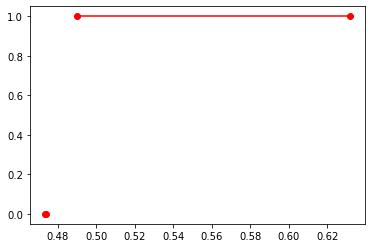

In [118]:
for lb,ub,y in zip(ci_win_acn,ci_win_friend,range(len(ci_win_friend))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(df_ci)),list(df_ci))

In [ ]:
df_away_egy=df_nonneutral[df_nonneutral.away_team=="Egypt"]

In [ ]:
df_away_egy

In [119]:
x=df_away_egy["results"].value_counts()

NameError: name 'df_away_egy' is not defined

In [120]:
x

win     7217
lose    4019
draw    3739
Name: results, dtype: int64

In [121]:
ci_win_away_egy=proportion_confint(count=x[0],nobs=x.sum(),alpha=(1-.95))

In [122]:
ci_win_away_egy

(0.4739335928548191, 0.4899395290149639)

In [123]:
df_away_egy["results"].value_counts(normalize=True)

NameError: name 'df_away_egy' is not defined

In [124]:
df_away_eng=df_nonneutral[df_nonneutral.away_team=="England"]

In [125]:
df_away_eng

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,results
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,draw
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,win
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,win
8,1878-03-02,Scotland,England,7,2,Friendly,Glasgow,Scotland,False,win
13,1880-03-13,Scotland,England,5,4,Friendly,Glasgow,Scotland,False,win
...,...,...,...,...,...,...,...,...,...,...
42143,3/28/2021,Albania,England,0,2,FIFA World Cup qualification,Tirana,Albania,False,lose
42629,09/02/2021,Hungary,England,0,4,FIFA World Cup qualification,Budapest,Hungary,False,lose
42744,09/08/2021,Poland,England,1,1,FIFA World Cup qualification,Warsaw,Poland,False,draw
42824,10/09/2021,Andorra,England,0,5,FIFA World Cup qualification,Andorra la Vella,Andorra,False,lose


In [126]:
x=df_away_eng["results"].value_counts()

In [127]:
x

lose    250
draw    113
win     101
Name: results, dtype: int64

In [128]:
df_away_eng["results"].value_counts(normalize=True)

lose    0.538793
draw    0.243534
win     0.217672
Name: results, dtype: float64

In [129]:
ci_win_away_eng=proportion_confint(count=x[0],nobs=x.sum(),alpha=(1-.95))

In [130]:
ci_win_away_eng

(0.49343571812724196, 0.5841504887693099)

In [186]:
ci_travel = {}
ci_travel['home_team'] = ['Abkhazia','Afghanistan','Albania']
ci_travel['lb'] = [CI_HR[0],CI_RD[0],CI_SL[0]]
ci_travel['ub'] = [CI_HR[1],CI_RD[1],CI_SL[1]]
df_ci= pd.DataFrame(ci_travel)
df_ci

,home_team,lb,ub
0,Abkhazia,0.000005,0.000483
1,Afghanistan,0.000000,0.000291
2,Albania,0.000073,0.000658


In [150]:
df_nonneutral

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,results
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,draw
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,win
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,win
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,draw
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,win
...,...,...,...,...,...,...,...,...,...,...
43181,02/01/2022,Nepal,Mauritius,1,0,Friendly,Kathmandu,Nepal,False,win
43182,02/01/2022,Nicaragua,Belize,1,1,Friendly,Managua,Nicaragua,False,draw
43183,02/01/2022,Suriname,Guyana,2,1,Friendly,Paramaribo,Suriname,False,win
43185,02/03/2022,Cameroon,Egypt,0,0,African Cup of Nations,Yaoundé,Cameroon,False,draw


In [172]:
tab = pd.crosstab(df_nonneutral["home_team"], df_nonneutral["results"],margins=True)
tab

results,draw,lose,win,All
home_team,,,,
Abkhazia,2,0,4,6
Afghanistan,1,3,2,6
Albania,38,65,61,164
Algeria,45,26,124,195
Andalusia,4,1,7,12
...,...,...,...,...
Zambia,58,36,143,237
Zanzibar,4,20,5,29
Zimbabwe,47,33,92,172


In [173]:
table = sm.stats.Table(tab)
table.table

array([[2.0000e+00, 5.0000e-01, 4.0000e+00, 6.0000e+00],
       [1.0000e+00, 3.0000e+00, 2.0000e+00, 6.0000e+00],
       [3.8000e+01, 6.5000e+01, 6.1000e+01, 1.6400e+02],
       ...,
       [4.7000e+01, 3.3000e+01, 9.2000e+01, 1.7200e+02],
       [1.0000e+00, 3.0000e+00, 5.0000e+00, 9.0000e+00],
       [7.5130e+03, 8.5650e+03, 1.6403e+04, 3.2481e+04]])

In [177]:
CI_HR=proportion_confint(count=table.table[0,2],nobs=table.table[265,2],alpha=(1-.95))
CI_HR

(4.910687839263905e-06, 0.00048280497392992464)

In [178]:
CI_RD=proportion_confint(count=table.table[1,2],nobs=table.table[265,2],alpha=(1-.95))
CI_RD

(0.0, 0.00029090036345777546)

In [179]:
CI_SL=proportion_confint(count=table.table[1,3],nobs=table.table[265,2],alpha=(1-.95))
CI_SL

(7.315530444951176e-05, 0.000658418188204271)

In [187]:
import matplotlib.pyplot as plt

In [193]:
 import math
from scipy import stats

In [194]:
 X= stats.norm(1.4,2)

In [195]:
X.cdf(0)

0.24196365222307303

In [196]:
X.pdf(1.4)

0.19947114020071635

([<matplotlib.axis.YTick at 0x7fdb63a772e0>,
 [Text(0, 0, 'Abkhazia'), Text(0, 1, 'Afghanistan'), Text(0, 2, 'Albania')])

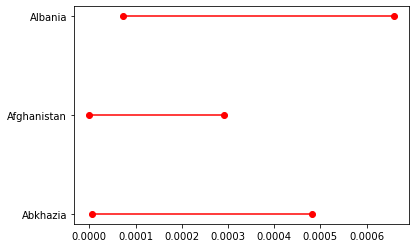

In [198]:
import matplotlib.pyplot as plt
for lb,ub,y in zip(df_ci['lb'],df_ci['ub'],range(len(df_ci))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(df_ci)),list(df_ci['home_team']))

In [199]:
df_senegal=df_nonneutral[df_nonneutral.home_team=="Senegal"]

In [200]:
df_senegal

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,results
5060,12/05/1961,Senegal,Gambia,2,3,Friendly,Dakar,Senegal,False,lose
5287,11/30/1962,Senegal,Ivory Coast,1,1,Friendly,Dakar,Senegal,False,draw
5545,11/21/1963,Senegal,Ethiopia,1,2,Friendly,Dakar,Senegal,False,lose
5570,12/15/1963,Senegal,Guinea,1,1,Friendly,Dakar,Senegal,False,draw
5864,05/05/1965,Senegal,Mali,3,1,African Cup of Nations qualification,Dakar,Senegal,False,win
...,...,...,...,...,...,...,...,...,...,...
42300,06/05/2021,Senegal,Zambia,3,1,Friendly,Thiès,Senegal,False,win
42353,06/08/2021,Senegal,Cape Verde,2,0,Friendly,Thiès,Senegal,False,win
42592,09/01/2021,Senegal,Togo,2,0,FIFA World Cup qualification,Thiès,Senegal,False,win
42830,10/09/2021,Senegal,Namibia,4,1,FIFA World Cup qualification,Thiès,Senegal,False,win


In [203]:
x=df_senegal["results"].value_counts()

In [204]:
x

win     115
draw     37
lose     22
Name: results, dtype: int64

In [202]:
df_senegal["results"].value_counts(normalize=True)

win     0.660920
draw    0.212644
lose    0.126437
Name: results, dtype: float64

In [205]:
ci_win_senegal=proportion_confint(count=x[0],nobs=x.sum(),alpha=(1-.95))

In [206]:
ci_win_senegal

(0.5905800616521878, 0.7312590188075824)

In [210]:
CI_SN=proportion_confint(count=115,nobs=table.table[265,2],alpha=(1-.95))
CI_SN

(0.005734044752379694, 0.008287780523484478)

In [211]:
CI_EG=proportion_confint(count=171,nobs=table.table[265,2],alpha=(1-.95))
CI_EG

(0.008870577931023093, 0.01197926660960972)

In [212]:
CI_EGL=proportion_confint(count=319,nobs=table.table[265,2],alpha=(1-.95))
CI_EGL

(0.01733438933875299, 0.0215609346873398)

In [207]:
tab = pd.crosstab(df_nonneutral["home_team"], df_nonneutral["results"],margins=True)
tab

results,draw,lose,win,All
home_team,,,,
Abkhazia,2,0,4,6
Afghanistan,1,3,2,6
Albania,38,65,61,164
Algeria,45,26,124,195
Andalusia,4,1,7,12
...,...,...,...,...
Zambia,58,36,143,237
Zanzibar,4,20,5,29
Zimbabwe,47,33,92,172


In [213]:
ci_travel = {}
ci_travel['home_team'] = ['Senegal','Egypt','England']
ci_travel['lb'] = [CI_SN[0],CI_EG[0],CI_EGL[0]]
ci_travel['ub'] = [CI_SN[1],CI_EG[1],CI_EGL[1]]
df_ci= pd.DataFrame(ci_travel)
df_ci

,home_team,lb,ub
0,Senegal,0.005734,0.008288
1,Egypt,0.008871,0.011979
2,England,0.017334,0.021561


([<matplotlib.axis.YTick at 0x7fdb6395de20>,
 [Text(0, 0, 'Senegal'), Text(0, 1, 'Egypt'), Text(0, 2, 'England')])

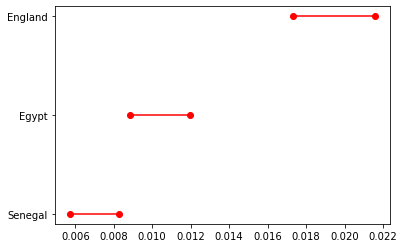

In [214]:
import matplotlib.pyplot as plt
for lb,ub,y in zip(df_ci['lb'],df_ci['ub'],range(len(df_ci))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(df_ci)),list(df_ci['home_team']))

END OF EXERCISE 1

In [4]:
df=pd.read_csv('covid_data.csv',encoding='latin-1')

In [12]:
import pandas as pd
import numpy as np

In [6]:
df

,date,iso3c,country,income,region,continent,dcases,ddeaths,population,weekdays,month
0,2020-02-24,AFG,Afghanistan,Low income,South Asia,Asia,5,0,38041754,Mon,Feb
1,2020-02-25,AFG,Afghanistan,Low income,South Asia,Asia,0,0,38041754,Tue,Feb
2,2020-02-26,AFG,Afghanistan,Low income,South Asia,Asia,0,0,38041754,Wed,Feb
3,2020-02-27,AFG,Afghanistan,Low income,South Asia,Asia,0,0,38041754,Thu,Feb
4,2020-02-28,AFG,Afghanistan,Low income,South Asia,Asia,0,0,38041754,Fri,Feb
...,...,...,...,...,...,...,...,...,...,...,...
122838,2021-12-27,ZWE,Zimbabwe,Lower middle income,Sub-Saharan Africa,Africa,1098,17,14645468,Mon,Dec
122839,2021-12-28,ZWE,Zimbabwe,Lower middle income,Sub-Saharan Africa,Africa,2099,32,14645468,Tue,Dec
122840,2021-12-29,ZWE,Zimbabwe,Lower middle income,Sub-Saharan Africa,Africa,0,0,14645468,Wed,Dec
122841,2021-12-30,ZWE,Zimbabwe,Lower middle income,Sub-Saharan Africa,Africa,4180,57,14645468,Thu,Dec


In [7]:
from pandas.api.types import CategoricalDtype
cats=['Fri', 'Sat', 'Sun','Mon','Tue','Wed','Thu']
cat_type = CategoricalDtype(categories=cats, ordered=True)
df['weekdays'] = df['weekdays'].astype(cat_type)

In [8]:
dfegy=df[df['country']=='Egypt']

In [9]:
dfegy

,date,iso3c,country,income,region,continent,dcases,ddeaths,population,weekdays,month
34049,2020-02-14,EGY,Egypt,Lower middle income,Middle East & North Africa,Africa,1,0,100388073,Fri,Feb
34050,2020-02-15,EGY,Egypt,Lower middle income,Middle East & North Africa,Africa,0,0,100388073,Sat,Feb
34051,2020-02-16,EGY,Egypt,Lower middle income,Middle East & North Africa,Africa,0,0,100388073,Sun,Feb
34052,2020-02-17,EGY,Egypt,Lower middle income,Middle East & North Africa,Africa,0,0,100388073,Mon,Feb
34053,2020-02-18,EGY,Egypt,Lower middle income,Middle East & North Africa,Africa,0,0,100388073,Tue,Feb
...,...,...,...,...,...,...,...,...,...,...,...
34731,2021-12-27,EGY,Egypt,Lower middle income,Middle East & North Africa,Africa,851,31,100388073,Mon,Dec
34732,2021-12-28,EGY,Egypt,Lower middle income,Middle East & North Africa,Africa,809,28,100388073,Tue,Dec
34733,2021-12-29,EGY,Egypt,Lower middle income,Middle East & North Africa,Africa,854,28,100388073,Wed,Dec
34734,2021-12-30,EGY,Egypt,Lower middle income,Middle East & North Africa,Africa,871,32,100388073,Thu,Dec


In [13]:
stats=dfegy.groupby("weekdays").agg({"dcases": [np.mean, np.std, np.size]})

In [14]:
stats

dcases                 
                mean         std size
weekdays                             
Fri       567.161616  428.533849   99
Sat       558.806122  421.803605   98
Sun       545.520408  422.358748   98
Mon       561.846939  442.137949   98
Tue       566.153061  419.125460   98
Wed       561.479592  406.337812   98
Thu       567.683673  410.020004   98

In [12]:
ci95_hi = []
ci95_lo = []

In [15]:
for i in stats.index:
    m, s, n = stats.loc[i]
    x=scipy.stats.t.interval(.95, n-1, m,s/np.sqrt(n-1))
    ci95_hi.append(x[1])
    ci95_lo.append(x[0])

In [14]:
import scipy

In [16]:
ci95_hi

[653.0661477518557,
 643.8071867945697,
 630.633343760431,
 650.9457415593621,
 650.614430845941,
 643.3640186561778,
 650.3101288341297]

In [17]:
ci95_lo

[481.2570845713766,
 473.80505810338957,
 460.4074725660996,
 472.74813599165833,
 481.6916916030385,
 479.5951650172916,
 485.0572181046457]

In [18]:
df


,date,iso3c,country,income,region,continent,dcases,ddeaths,population,weekdays,month
0,2020-02-24,AFG,Afghanistan,Low income,South Asia,Asia,5,0,38041754,Mon,Feb
1,2020-02-25,AFG,Afghanistan,Low income,South Asia,Asia,0,0,38041754,Tue,Feb
2,2020-02-26,AFG,Afghanistan,Low income,South Asia,Asia,0,0,38041754,Wed,Feb
3,2020-02-27,AFG,Afghanistan,Low income,South Asia,Asia,0,0,38041754,Thu,Feb
4,2020-02-28,AFG,Afghanistan,Low income,South Asia,Asia,0,0,38041754,Fri,Feb
...,...,...,...,...,...,...,...,...,...,...,...
122838,2021-12-27,ZWE,Zimbabwe,Lower middle income,Sub-Saharan Africa,Africa,1098,17,14645468,Mon,Dec
122839,2021-12-28,ZWE,Zimbabwe,Lower middle income,Sub-Saharan Africa,Africa,2099,32,14645468,Tue,Dec
122840,2021-12-29,ZWE,Zimbabwe,Lower middle income,Sub-Saharan Africa,Africa,0,0,14645468,Wed,Dec
122841,2021-12-30,ZWE,Zimbabwe,Lower middle income,Sub-Saharan Africa,Africa,4180,57,14645468,Thu,Dec


In [19]:
dfegy["ddeaths"]/dfegy["dcases"]

34049    0.000000
34050         NaN
34051         NaN
34052         NaN
34053         NaN
           ...   
34731    0.036428
34732    0.034611
34733    0.032787
34734    0.036739
34735    0.029516
Length: 687, dtype: float64

In [21]:
x=dfegy["ddeaths"].sum()

In [22]:
y=dfegy["dcases"].sum()

In [23]:
x/y

0.05641444595733645

In [24]:
y/x

17.725956233909525

1:17 deaths:cases ratio for egypt

In [25]:
dfsa=df[df['region']=='South Asia']

In [26]:
dfsa

,date,iso3c,country,income,region,continent,dcases,ddeaths,population,weekdays,month
0,2020-02-24,AFG,Afghanistan,Low income,South Asia,Asia,5,0,38041754,Mon,Feb
1,2020-02-25,AFG,Afghanistan,Low income,South Asia,Asia,0,0,38041754,Tue,Feb
2,2020-02-26,AFG,Afghanistan,Low income,South Asia,Asia,0,0,38041754,Wed,Feb
3,2020-02-27,AFG,Afghanistan,Low income,South Asia,Asia,0,0,38041754,Thu,Feb
4,2020-02-28,AFG,Afghanistan,Low income,South Asia,Asia,0,0,38041754,Fri,Feb
...,...,...,...,...,...,...,...,...,...,...,...
87548,2021-12-27,PAK,Pakistan,Lower middle income,South Asia,Asia,316,3,216565318,Mon,Dec
87549,2021-12-28,PAK,Pakistan,Lower middle income,South Asia,Asia,348,6,216565318,Tue,Dec
87550,2021-12-29,PAK,Pakistan,Lower middle income,South Asia,Asia,482,3,216565318,Wed,Dec
87551,2021-12-30,PAK,Pakistan,Lower middle income,South Asia,Asia,515,6,216565318,Thu,Dec


In [31]:
x=dfsa["ddeaths"].sum()

In [32]:
y=dfsa["dcases"].sum()

In [33]:
y/x

68.82510485676269

1:69 deaths to cases ratio for south asia region

In [34]:
df

,date,iso3c,country,income,region,continent,dcases,ddeaths,population,weekdays,month
0,2020-02-24,AFG,Afghanistan,Low income,South Asia,Asia,5,0,38041754,Mon,Feb
1,2020-02-25,AFG,Afghanistan,Low income,South Asia,Asia,0,0,38041754,Tue,Feb
2,2020-02-26,AFG,Afghanistan,Low income,South Asia,Asia,0,0,38041754,Wed,Feb
3,2020-02-27,AFG,Afghanistan,Low income,South Asia,Asia,0,0,38041754,Thu,Feb
4,2020-02-28,AFG,Afghanistan,Low income,South Asia,Asia,0,0,38041754,Fri,Feb
...,...,...,...,...,...,...,...,...,...,...,...
122838,2021-12-27,ZWE,Zimbabwe,Lower middle income,Sub-Saharan Africa,Africa,1098,17,14645468,Mon,Dec
122839,2021-12-28,ZWE,Zimbabwe,Lower middle income,Sub-Saharan Africa,Africa,2099,32,14645468,Tue,Dec
122840,2021-12-29,ZWE,Zimbabwe,Lower middle income,Sub-Saharan Africa,Africa,0,0,14645468,Wed,Dec
122841,2021-12-30,ZWE,Zimbabwe,Lower middle income,Sub-Saharan Africa,Africa,4180,57,14645468,Thu,Dec


In [35]:
df["region"].value_counts()

Europe & Central Asia         34358
Sub-Saharan Africa            30674
Latin America & Caribbean     21795
East Asia & Pacific           15056
Middle East & North Africa    14080
South Asia                     5461
North America(region)          1419
Name: region, dtype: int64

In [42]:
dfeu=df[df['region']=='Europe & Central Asia']

In [43]:
dfeu

,date,iso3c,country,income,region,continent,dcases,ddeaths,population,weekdays,month
1329,2020-03-09,ALB,Albania,Upper middle income,Europe & Central Asia,Europe,2,0,2854191,Mon,Mar
1330,2020-03-10,ALB,Albania,Upper middle income,Europe & Central Asia,Europe,8,0,2854191,Tue,Mar
1331,2020-03-11,ALB,Albania,Upper middle income,Europe & Central Asia,Europe,2,1,2854191,Wed,Mar
1332,2020-03-12,ALB,Albania,Upper middle income,Europe & Central Asia,Europe,11,0,2854191,Thu,Mar
1333,2020-03-13,ALB,Albania,Upper middle income,Europe & Central Asia,Europe,10,0,2854191,Fri,Mar
...,...,...,...,...,...,...,...,...,...,...,...
117383,2021-12-27,UZB,Uzbekistan,Lower middle income,Europe & Central Asia,Asia,145,2,33580650,Mon,Dec
117384,2021-12-28,UZB,Uzbekistan,Lower middle income,Europe & Central Asia,Asia,100,3,33580650,Tue,Dec
117385,2021-12-29,UZB,Uzbekistan,Lower middle income,Europe & Central Asia,Asia,139,1,33580650,Wed,Dec
117386,2021-12-30,UZB,Uzbekistan,Lower middle income,Europe & Central Asia,Asia,143,0,33580650,Thu,Dec


In [44]:
x=dfeu["ddeaths"].sum()

In [45]:
y=dfeu["dcases"].sum()

In [46]:
y/x

61.16489198072222

1:61 death to cases ratio 

In [47]:
dfaf=df[df['region']=='Sub-Saharan Africa']

In [48]:
dfaf

,date,iso3c,country,income,region,continent,dcases,ddeaths,population,weekdays,month
677,2020-03-20,AGO,Angola,Lower middle income,Sub-Saharan Africa,Africa,1,0,31825295,Fri,Mar
678,2020-03-21,AGO,Angola,Lower middle income,Sub-Saharan Africa,Africa,1,0,31825295,Sat,Mar
679,2020-03-22,AGO,Angola,Lower middle income,Sub-Saharan Africa,Africa,0,0,31825295,Sun,Mar
680,2020-03-23,AGO,Angola,Lower middle income,Sub-Saharan Africa,Africa,1,0,31825295,Mon,Mar
681,2020-03-24,AGO,Angola,Lower middle income,Sub-Saharan Africa,Africa,0,0,31825295,Tue,Mar
...,...,...,...,...,...,...,...,...,...,...,...
122838,2021-12-27,ZWE,Zimbabwe,Lower middle income,Sub-Saharan Africa,Africa,1098,17,14645468,Mon,Dec
122839,2021-12-28,ZWE,Zimbabwe,Lower middle income,Sub-Saharan Africa,Africa,2099,32,14645468,Tue,Dec
122840,2021-12-29,ZWE,Zimbabwe,Lower middle income,Sub-Saharan Africa,Africa,0,0,14645468,Wed,Dec
122841,2021-12-30,ZWE,Zimbabwe,Lower middle income,Sub-Saharan Africa,Africa,4180,57,14645468,Thu,Dec


In [49]:
x=dfaf["ddeaths"].sum()

In [50]:
y=dfaf["dcases"].sum()

In [51]:
y/x

45.76303904901567

1:45 deaths to cases

In [55]:
dflmi=df[df['income']=='Lower middle income']

In [56]:
dflmi

,date,iso3c,country,income,region,continent,dcases,ddeaths,population,weekdays,month
677,2020-03-20,AGO,Angola,Lower middle income,Sub-Saharan Africa,Africa,1,0,31825295,Fri,Mar
678,2020-03-21,AGO,Angola,Lower middle income,Sub-Saharan Africa,Africa,1,0,31825295,Sat,Mar
679,2020-03-22,AGO,Angola,Lower middle income,Sub-Saharan Africa,Africa,0,0,31825295,Sun,Mar
680,2020-03-23,AGO,Angola,Lower middle income,Sub-Saharan Africa,Africa,1,0,31825295,Mon,Mar
681,2020-03-24,AGO,Angola,Lower middle income,Sub-Saharan Africa,Africa,0,0,31825295,Tue,Mar
...,...,...,...,...,...,...,...,...,...,...,...
122838,2021-12-27,ZWE,Zimbabwe,Lower middle income,Sub-Saharan Africa,Africa,1098,17,14645468,Mon,Dec
122839,2021-12-28,ZWE,Zimbabwe,Lower middle income,Sub-Saharan Africa,Africa,2099,32,14645468,Tue,Dec
122840,2021-12-29,ZWE,Zimbabwe,Lower middle income,Sub-Saharan Africa,Africa,0,0,14645468,Wed,Dec
122841,2021-12-30,ZWE,Zimbabwe,Lower middle income,Sub-Saharan Africa,Africa,4180,57,14645468,Thu,Dec


In [61]:
x=dflmi["ddeaths"].sum()

In [62]:
y=dflmi["dcases"].sum()

In [63]:
y/x

55.762316190227644

1:55 deaths to cases ratio

In [64]:
df["income"].value_counts()

High income            38802
Upper middle income    35573
Lower middle income    29532
Low income             18936
Name: income, dtype: int64

In [67]:
dfhi=df[df['income']=='High income']

In [68]:
dfhi

,date,iso3c,country,income,region,continent,dcases,ddeaths,population,weekdays,month
1992,2020-03-02,AND,Andorra,High income,Europe & Central Asia,Europe,1,0,77142,Mon,Mar
1993,2020-03-03,AND,Andorra,High income,Europe & Central Asia,Europe,0,0,77142,Tue,Mar
1994,2020-03-04,AND,Andorra,High income,Europe & Central Asia,Europe,0,0,77142,Wed,Mar
1995,2020-03-05,AND,Andorra,High income,Europe & Central Asia,Europe,0,0,77142,Thu,Mar
1996,2020-03-06,AND,Andorra,High income,Europe & Central Asia,Europe,0,0,77142,Fri,Mar
...,...,...,...,...,...,...,...,...,...,...,...
116726,2021-12-27,USA,United States,High income,North America(region),North America(continent),509091,1893,328239523,Mon,Dec
116727,2021-12-28,USA,United States,High income,North America(region),North America(continent),356803,2404,328239523,Tue,Dec
116728,2021-12-29,USA,United States,High income,North America(region),North America(continent),499463,2318,328239523,Wed,Dec
116729,2021-12-30,USA,United States,High income,North America(region),North America(continent),589444,1541,328239523,Thu,Dec


In [69]:
x=dfhi["ddeaths"].sum()

In [70]:
y=dfhi["dcases"].sum()

In [71]:
y/x

69.7100337253448

1:69 deaths to cases ratio 

In [74]:
dfli=df[df['income']=='Low income']

In [75]:
dfli

,date,iso3c,country,income,region,continent,dcases,ddeaths,population,weekdays,month
0,2020-02-24,AFG,Afghanistan,Low income,South Asia,Asia,5,0,38041754,Mon,Feb
1,2020-02-25,AFG,Afghanistan,Low income,South Asia,Asia,0,0,38041754,Tue,Feb
2,2020-02-26,AFG,Afghanistan,Low income,South Asia,Asia,0,0,38041754,Wed,Feb
3,2020-02-27,AFG,Afghanistan,Low income,South Asia,Asia,0,0,38041754,Thu,Feb
4,2020-02-28,AFG,Afghanistan,Low income,South Asia,Asia,0,0,38041754,Fri,Feb
...,...,...,...,...,...,...,...,...,...,...,...
120865,2021-12-27,YEM,Yemen,Low income,Middle East & North Africa,Asia,3,1,29161922,Mon,Dec
120866,2021-12-28,YEM,Yemen,Low income,Middle East & North Africa,Asia,5,0,29161922,Tue,Dec
120867,2021-12-29,YEM,Yemen,Low income,Middle East & North Africa,Asia,2,0,29161922,Wed,Dec
120868,2021-12-30,YEM,Yemen,Low income,Middle East & North Africa,Asia,1,0,29161922,Thu,Dec


In [76]:
x=dfli["ddeaths"].sum()

In [77]:
y=dfli["dcases"].sum()

In [78]:
y/x

50.16543123206211

1:50 deaths to cases ratio for low income

In [79]:
df

,date,iso3c,country,income,region,continent,dcases,ddeaths,population,weekdays,month
0,2020-02-24,AFG,Afghanistan,Low income,South Asia,Asia,5,0,38041754,Mon,Feb
1,2020-02-25,AFG,Afghanistan,Low income,South Asia,Asia,0,0,38041754,Tue,Feb
2,2020-02-26,AFG,Afghanistan,Low income,South Asia,Asia,0,0,38041754,Wed,Feb
3,2020-02-27,AFG,Afghanistan,Low income,South Asia,Asia,0,0,38041754,Thu,Feb
4,2020-02-28,AFG,Afghanistan,Low income,South Asia,Asia,0,0,38041754,Fri,Feb
...,...,...,...,...,...,...,...,...,...,...,...
122838,2021-12-27,ZWE,Zimbabwe,Lower middle income,Sub-Saharan Africa,Africa,1098,17,14645468,Mon,Dec
122839,2021-12-28,ZWE,Zimbabwe,Lower middle income,Sub-Saharan Africa,Africa,2099,32,14645468,Tue,Dec
122840,2021-12-29,ZWE,Zimbabwe,Lower middle income,Sub-Saharan Africa,Africa,0,0,14645468,Wed,Dec
122841,2021-12-30,ZWE,Zimbabwe,Lower middle income,Sub-Saharan Africa,Africa,4180,57,14645468,Thu,Dec


In [80]:
df["country"].value_counts()

South Korea         710
Thailand            710
United States       710
Japan               710
China               710
                   ... 
Marshall Islands    430
Vanuatu             417
Samoa               409
Kiribati            228
Palau               132
Name: country, Length: 187, dtype: int64

In [51]:
dfch=df[df['country']=="China"]

In [85]:
dfch

,date,iso3c,country,income,region,continent,dcases,ddeaths,population,weekdays,month
21405,2020-01-22,CHN,China,Upper middle income,East Asia & Pacific,Asia,548,17,1397715000,Wed,Jan
21406,2020-01-23,CHN,China,Upper middle income,East Asia & Pacific,Asia,95,1,1397715000,Thu,Jan
21407,2020-01-24,CHN,China,Upper middle income,East Asia & Pacific,Asia,277,8,1397715000,Fri,Jan
21408,2020-01-25,CHN,China,Upper middle income,East Asia & Pacific,Asia,486,16,1397715000,Sat,Jan
21409,2020-01-26,CHN,China,Upper middle income,East Asia & Pacific,Asia,669,14,1397715000,Sun,Jan
...,...,...,...,...,...,...,...,...,...,...,...
22110,2021-12-27,CHN,China,Upper middle income,East Asia & Pacific,Asia,371,0,1397715000,Mon,Dec
22111,2021-12-28,CHN,China,Upper middle income,East Asia & Pacific,Asia,203,0,1397715000,Tue,Dec
22112,2021-12-29,CHN,China,Upper middle income,East Asia & Pacific,Asia,221,0,1397715000,Wed,Dec
22113,2021-12-30,CHN,China,Upper middle income,East Asia & Pacific,Asia,208,0,1397715000,Thu,Dec


In [86]:
x=dfch["ddeaths"].sum()

In [87]:
y=dfch["dcases"].sum()

In [88]:
y/x

23.710634789777412

1:23 deaths to cases ratio for china 

In [90]:
dfas=df[df['continent']=='Asia']

In [91]:
dfas

,date,iso3c,country,income,region,continent,dcases,ddeaths,population,weekdays,month
0,2020-02-24,AFG,Afghanistan,Low income,South Asia,Asia,5,0,38041754,Mon,Feb
1,2020-02-25,AFG,Afghanistan,Low income,South Asia,Asia,0,0,38041754,Tue,Feb
2,2020-02-26,AFG,Afghanistan,Low income,South Asia,Asia,0,0,38041754,Wed,Feb
3,2020-02-27,AFG,Afghanistan,Low income,South Asia,Asia,0,0,38041754,Thu,Feb
4,2020-02-28,AFG,Afghanistan,Low income,South Asia,Asia,0,0,38041754,Fri,Feb
...,...,...,...,...,...,...,...,...,...,...,...
120865,2021-12-27,YEM,Yemen,Low income,Middle East & North Africa,Asia,3,1,29161922,Mon,Dec
120866,2021-12-28,YEM,Yemen,Low income,Middle East & North Africa,Asia,5,0,29161922,Tue,Dec
120867,2021-12-29,YEM,Yemen,Low income,Middle East & North Africa,Asia,2,0,29161922,Wed,Dec
120868,2021-12-30,YEM,Yemen,Low income,Middle East & North Africa,Asia,1,0,29161922,Thu,Dec


In [92]:
x=dfas["ddeaths"].sum()

In [93]:
y=dfas["dcases"].sum()

In [94]:
y/x

67.55637377042936

1:67 deaths to cases ratio for the continent asia 

In [95]:
df["continent"].value_counts()

Africa                      34677
Asia                        31103
Europe                      29103
North America(continent)    15229
South America(continent)     7985
Oceania                      4746
Name: continent, dtype: int64

In [97]:
dfaf=df[df['continent']=='Africa']

In [98]:
x=dfaf["ddeaths"].sum()

In [99]:
y=dfaf["dcases"].sum()

In [100]:
y/x

42.67195419807233

1:42 death to cases ratio for the continent africa

In [101]:
df

,date,iso3c,country,income,region,continent,dcases,ddeaths,population,weekdays,month
0,2020-02-24,AFG,Afghanistan,Low income,South Asia,Asia,5,0,38041754,Mon,Feb
1,2020-02-25,AFG,Afghanistan,Low income,South Asia,Asia,0,0,38041754,Tue,Feb
2,2020-02-26,AFG,Afghanistan,Low income,South Asia,Asia,0,0,38041754,Wed,Feb
3,2020-02-27,AFG,Afghanistan,Low income,South Asia,Asia,0,0,38041754,Thu,Feb
4,2020-02-28,AFG,Afghanistan,Low income,South Asia,Asia,0,0,38041754,Fri,Feb
...,...,...,...,...,...,...,...,...,...,...,...
122838,2021-12-27,ZWE,Zimbabwe,Lower middle income,Sub-Saharan Africa,Africa,1098,17,14645468,Mon,Dec
122839,2021-12-28,ZWE,Zimbabwe,Lower middle income,Sub-Saharan Africa,Africa,2099,32,14645468,Tue,Dec
122840,2021-12-29,ZWE,Zimbabwe,Lower middle income,Sub-Saharan Africa,Africa,0,0,14645468,Wed,Dec
122841,2021-12-30,ZWE,Zimbabwe,Lower middle income,Sub-Saharan Africa,Africa,4180,57,14645468,Thu,Dec


In [116]:
dfda=df[0:312]

In [117]:
dfda

,date,iso3c,country,income,region,continent,dcases,ddeaths,population,weekdays,month,data
0,2020-02-24,AFG,Afghanistan,Low income,South Asia,Asia,5,0,38041754,Mon,Feb,2020
1,2020-02-25,AFG,Afghanistan,Low income,South Asia,Asia,0,0,38041754,Tue,Feb,2020
2,2020-02-26,AFG,Afghanistan,Low income,South Asia,Asia,0,0,38041754,Wed,Feb,2020
3,2020-02-27,AFG,Afghanistan,Low income,South Asia,Asia,0,0,38041754,Thu,Feb,2020
4,2020-02-28,AFG,Afghanistan,Low income,South Asia,Asia,0,0,38041754,Fri,Feb,2020
...,...,...,...,...,...,...,...,...,...,...,...,...
307,2020-12-27,AFG,Afghanistan,Low income,South Asia,Asia,84,10,38041754,Sun,Dec,2020
308,2020-12-28,AFG,Afghanistan,Low income,South Asia,Asia,159,12,38041754,Mon,Dec,2020
309,2020-12-29,AFG,Afghanistan,Low income,South Asia,Asia,140,12,38041754,Tue,Dec,2020
310,2020-12-30,AFG,Afghanistan,Low income,South Asia,Asia,183,7,38041754,Wed,Dec,2020


In [122]:
x=dfda["ddeaths"].sum()

In [123]:
y=dfda["dcases"].sum()

In [124]:
y/x

23.90680676107812

1:24 is the ratio between deaths and cases in the year 2020

In [125]:
df21=df[313:]

In [15]:
df

,date,iso3c,country,income,region,continent,dcases,ddeaths,population,weekdays,month
0,2020-02-24,AFG,Afghanistan,Low income,South Asia,Asia,5,0,38041754,Mon,Feb
1,2020-02-25,AFG,Afghanistan,Low income,South Asia,Asia,0,0,38041754,Tue,Feb
2,2020-02-26,AFG,Afghanistan,Low income,South Asia,Asia,0,0,38041754,Wed,Feb
3,2020-02-27,AFG,Afghanistan,Low income,South Asia,Asia,0,0,38041754,Thu,Feb
4,2020-02-28,AFG,Afghanistan,Low income,South Asia,Asia,0,0,38041754,Fri,Feb
...,...,...,...,...,...,...,...,...,...,...,...
122838,2021-12-27,ZWE,Zimbabwe,Lower middle income,Sub-Saharan Africa,Africa,1098,17,14645468,Mon,Dec
122839,2021-12-28,ZWE,Zimbabwe,Lower middle income,Sub-Saharan Africa,Africa,2099,32,14645468,Tue,Dec
122840,2021-12-29,ZWE,Zimbabwe,Lower middle income,Sub-Saharan Africa,Africa,0,0,14645468,Wed,Dec
122841,2021-12-30,ZWE,Zimbabwe,Lower middle income,Sub-Saharan Africa,Africa,4180,57,14645468,Thu,Dec


In [28]:
df["date"][0]

Timestamp('2020-02-24 00:00:00')

In [29]:
df["date"]=pd.to_datetime(df["date"],format="%Y-%m-%d")

In [30]:
df["date"][0]

Timestamp('2020-02-24 00:00:00')

In [31]:
df["year"]=pd.DatetimeIndex(df["date"]).year

In [32]:
df["year"][0]

2020

In [33]:
df["year"]

0         2020
1         2020
2         2020
3         2020
4         2020
          ... 
122838    2021
122839    2021
122840    2021
122841    2021
122842    2021
Name: year, Length: 122843, dtype: int64

In [34]:
df["year"].value_counts()

2021    67885
2020    54958
Name: year, dtype: int64

In [44]:
df20=df[df['year']=='2020']

In [45]:
df20

,date,iso3c,country,income,region,continent,dcases,ddeaths,population,weekdays,month,year


In [47]:
df20["dcases"].sum()

0

In [48]:
df

,date,iso3c,country,income,region,continent,dcases,ddeaths,population,weekdays,month,year
0,2020-02-24,AFG,Afghanistan,Low income,South Asia,Asia,5,0,38041754,Mon,Feb,2020
1,2020-02-25,AFG,Afghanistan,Low income,South Asia,Asia,0,0,38041754,Tue,Feb,2020
2,2020-02-26,AFG,Afghanistan,Low income,South Asia,Asia,0,0,38041754,Wed,Feb,2020
3,2020-02-27,AFG,Afghanistan,Low income,South Asia,Asia,0,0,38041754,Thu,Feb,2020
4,2020-02-28,AFG,Afghanistan,Low income,South Asia,Asia,0,0,38041754,Fri,Feb,2020
...,...,...,...,...,...,...,...,...,...,...,...,...
122838,2021-12-27,ZWE,Zimbabwe,Lower middle income,Sub-Saharan Africa,Africa,1098,17,14645468,Mon,Dec,2021
122839,2021-12-28,ZWE,Zimbabwe,Lower middle income,Sub-Saharan Africa,Africa,2099,32,14645468,Tue,Dec,2021
122840,2021-12-29,ZWE,Zimbabwe,Lower middle income,Sub-Saharan Africa,Africa,0,0,14645468,Wed,Dec,2021
122841,2021-12-30,ZWE,Zimbabwe,Lower middle income,Sub-Saharan Africa,Africa,4180,57,14645468,Thu,Dec,2021


In [61]:
dfsa=df[df["region"]=="South Asia"]

In [62]:
dfsa

,date,iso3c,country,income,region,continent,dcases,ddeaths,population,weekdays,month,year
0,2020-02-24,AFG,Afghanistan,Low income,South Asia,Asia,5,0,38041754,Mon,Feb,2020
1,2020-02-25,AFG,Afghanistan,Low income,South Asia,Asia,0,0,38041754,Tue,Feb,2020
2,2020-02-26,AFG,Afghanistan,Low income,South Asia,Asia,0,0,38041754,Wed,Feb,2020
3,2020-02-27,AFG,Afghanistan,Low income,South Asia,Asia,0,0,38041754,Thu,Feb,2020
4,2020-02-28,AFG,Afghanistan,Low income,South Asia,Asia,0,0,38041754,Fri,Feb,2020
...,...,...,...,...,...,...,...,...,...,...,...,...
87548,2021-12-27,PAK,Pakistan,Lower middle income,South Asia,Asia,316,3,216565318,Mon,Dec,2021
87549,2021-12-28,PAK,Pakistan,Lower middle income,South Asia,Asia,348,6,216565318,Tue,Dec,2021
87550,2021-12-29,PAK,Pakistan,Lower middle income,South Asia,Asia,482,3,216565318,Wed,Dec,2021
87551,2021-12-30,PAK,Pakistan,Lower middle income,South Asia,Asia,515,6,216565318,Thu,Dec,2021


In [66]:
x=dfsa["dcases"].sum()

In [67]:
x

39415174

In [68]:
y=dfsa["ddeaths"].sum()

In [70]:
x/y

68.82510485676269

the ratio of deaths to cases is 1:69 in the region South Asia 

In [73]:
df["year"].value_counts()

2021    67885
2020    54958
Name: year, dtype: int64

In [76]:
from pandas.api.types import CategoricalDtype
cats=['Africa', 'Asia', 'Europe','North America(continent)','South America(continent)','Oceania',]
cat_type = CategoricalDtype(categories=cats, ordered=True)
df['continent'] = df['continent'].astype(cat_type)

In [79]:
stats=dfegy.groupby('continent').agg({"dcases": [np.mean, np.std, np.size]})

In [80]:
df["continent"].value_counts()

Africa                      34677
Asia                        31103
Europe                      29103
North America(continent)    15229
South America(continent)     7985
Oceania                      4746
Name: continent, dtype: int64

In [81]:
stats

dcases                 
                 mean         std size
continent                             
Africa     561.244541  419.839531  687